# EDA

## Play Data

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

# Always make it pretty.
plt.style.use('seaborn')

In [2]:
#import pandas as pd

schema_play ={'uid':float,'device':object,'song_id':object,'song_type':object,
              'play_time':object,'song_length':object,'paid_flag':object,'filename':object}
df_play = pd.read_csv('play.csv',dtype=schema_play)

In [3]:
df_play.head()

,Unnamed: 0,uid,device,song_id,song_type,play_time,song_length,paid_flag,filename
0,1,154431666.0,ar,6651913,0,252,251,0.0,20170302_1_play.log
1,15,154439516.0,ar,20870987,0,358,358,0.0,20170302_1_play.log
2,131,154827198.0,ar,0,1,242,242,0.0,20170302_1_play.log
3,147,154284307.0,ar,6480203,0,261,262,0.0,20170302_1_play.log
4,148,154549560.0,ar,4860986,0,302,301,0.0,20170302_1_play.log


In [4]:
#Drop 'Unnamed: 0' column
df_play = df_play.drop('Unnamed: 0', 1)

In [5]:
df_play.shape

(11108889, 8)

### Date 

In [6]:
# Generate Date column from original log file name
def get_date(file_name):
    tmp_list = str(file_name).strip().split('_')
    time=tmp_list[0]
    
    return time[0:4]+'-'+time[4:6]+'-'+time[6:]


In [7]:
df_play['date'] = df_play['filename'].map(get_date)
df_play['date'].unique()

array(['2017-03-02', '2017-05-12', '2017-05-04', '2017-04-22',
       '2017-04-12', '2017-04-21', '2017-04-04', '2017-04-18',
       '2017-04-28', '2017-04-13', '2017-04-23', '2017-04-10',
       '2017-04-05', '2017-04-06', '2017-04-29', '2017-04-19',
       '2017-03-30', '2017-05-10', '2017-05-06', '2017-03-09',
       '2017-05-05', '2017-04-01', '2017-04-02', '2017-04-17',
       '2017-04-14', '2017-04-24', '2017-04-08', '2017-05-08',
       '2017-05-02', '2017-05-01', '2017-05-09', '2017-03-05',
       '2017-05-03', '2017-04-30', '2017-04-03', '2017-04-26',
       '2017-04-25', '2017-04-15', '2017-04-09', '2017-04-20',
       '2017-03-31', '2017-05-07', '2017-05-11', '2017-04-07',
       '2017-04-11', '2017-04-16', '2017-04-27', '2017-03-01',
       '2017-03-07', '2017-03-06', '2017-03-04', '2017-03-39',
       '2017-03-03', '2017-03-08'], dtype=object)

In [8]:
# Check the wrong date and change back to the right date
df_play.loc[df_play['date']=='2017-03-39','date']='2017-03-29'

In [9]:
df_play['date']=pd.to_datetime(df_play['date'])

#### Check daily active users

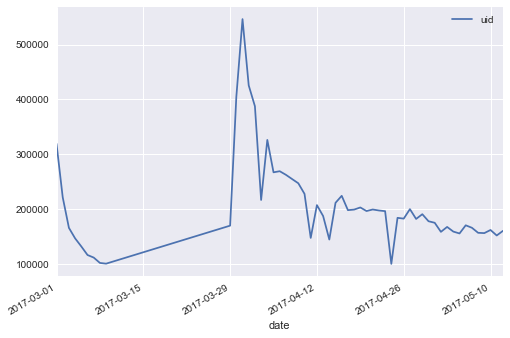

In [10]:
df_play[['uid','date']].groupby('date').count().plot()

In [11]:
# keep the play log starting from 03-30
df_play=df_play.loc[df_play['date']>='2017-03-30',:]

In [12]:
df_play.isnull().sum()

uid            0
device         0
song_id        0
song_type      0
play_time      0
song_length    0
paid_flag      0
filename       0
date           0
dtype: int64

In [13]:
# uid
len(df_play['uid'].unique())

54305

In [14]:
# Song id 
len(df_play['song_id'].unique())

495739

In [15]:
# paid_flag not useful infomation, to be dropped
#df_play['paid_flag'].unique()

In [16]:
# song type
df_play['song_type'].unique()

array(['0.0', '1.0', '2.0', '3.0', '0', '1', '2', '3'], dtype=object)

In [17]:
df_play['song_type']=df_play['song_type'].astype(float)

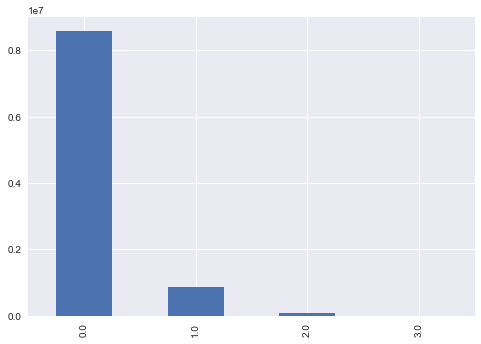

In [18]:
df_play['song_type'].value_counts().plot.bar()

### Play_time and Song_length

In [19]:
def is_float(input):
    try:
        num = float(input)
    except ValueError:
        return False
    return True

In [20]:
df_play['playtime_float']=df_play['play_time'].map(is_float)
df_play.loc[df_play['playtime_float']==False,'play_time']
print(len(df_play.loc[df_play['playtime_float']==False,'play_time'])/len(df_play))

0.004869892826220735


In [21]:
# Delete the lines non float 'play_time'
df_play=df_play.loc[df_play['playtime_float']==True,:]

In [22]:
# change the type of play_time to float
df_play['play_time']=df_play['play_time'].astype('float')

In [23]:
df_play['play_time'].describe()

count    9.472948e+06
mean     1.062761e+03
std      1.214174e+06
min     -2.147484e+09
25%      2.000000e+00
50%      1.320000e+02
75%      2.420000e+02
max      1.787299e+08
Name: play_time, dtype: float64

In [24]:
len(df_play.loc[df_play['play_time']<0,:])

7

In [25]:
df_play.loc[df_play['play_time']<0,:].groupby('uid').count()

,device,song_id,song_type,play_time,song_length,paid_flag,filename,date,playtime_float
uid,,,,,,,,,
41066873.0,1,1,1,1,1,1,1,1,1
167573420.0,1,1,1,1,1,1,1,1,1
168379069.0,1,1,1,1,1,1,1,1,1
168619893.0,1,1,1,1,1,1,1,1,1
168713638.0,1,1,1,1,1,1,1,1,1
168714443.0,1,1,1,1,1,1,1,1,1
168957845.0,1,1,1,1,1,1,1,1,1


In [26]:
# There are very long play time, we will check the song length later
df_play['play_time'].describe()

count    9.472948e+06
mean     1.062761e+03
std      1.214174e+06
min     -2.147484e+09
25%      2.000000e+00
50%      1.320000e+02
75%      2.420000e+02
max      1.787299e+08
Name: play_time, dtype: float64

In [27]:
len(df_play.loc[df_play['play_time']>1000000,:])

141

In [28]:
df_play['song_length'].isnull().sum()

0

In [29]:
df_play['song_length']=df_play['song_length'].astype('float')

In [30]:
# There are also negative/long song length 
df_play['song_length'].describe()

count    9.472948e+06
mean    -4.302228e+02
std      1.208504e+06
min     -2.147484e+09
25%      1.950000e+02
50%      2.380000e+02
75%      2.760000e+02
max      1.210550e+05
Name: song_length, dtype: float64

In [31]:
len(df_play.loc[df_play['song_length']<0,:])

345

In [32]:
#
df_play.loc[df_play['song_length']<0,:].groupby('uid').count()

,device,song_id,song_type,play_time,song_length,paid_flag,filename,date,playtime_float
uid,,,,,,,,,
167573420.0,1,1,1,1,1,1,1,1,1
167646347.0,139,139,139,139,139,139,139,139,139
167717628.0,13,13,13,13,13,13,13,13,13
167730498.0,5,5,5,5,5,5,5,5,5
168234247.0,34,34,34,34,34,34,34,34,34
168422167.0,2,2,2,2,2,2,2,2,2
168544423.0,6,6,6,6,6,6,6,6,6
168564598.0,41,41,41,41,41,41,41,41,41
168713638.0,1,1,1,1,1,1,1,1,1


In [33]:
neg_time=df_play.loc[df_play['play_time']<0,'uid'].unique()
neg_length=df_play.loc[df_play['song_length']<0,'uid'].unique()
set(neg_time).intersection(set(neg_length))

{167573420.0, 168713638.0, 168714443.0}

In [34]:
# Put the uids which will be exclued in a list 
uid_exclude=neg_time.tolist()
uid_exclude.extend(neg_length.tolist())
uid_exclude

[168379069.0,
 168713638.0,
 168714443.0,
 168619893.0,
 167573420.0,
 168957845.0,
 41066873.0,
 167646347.0,
 168983889.0,
 168234247.0,
 168544423.0,
 168847451.0,
 168963315.0,
 168972718.0,
 168722433.0,
 168903812.0,
 168422167.0,
 168564598.0,
 167717628.0,
 168713638.0,
 168917303.0,
 168714443.0,
 168772554.0,
 167573420.0,
 167730498.0]

In [35]:
df_play.loc[df_play['play_time']>1000000,:].groupby(['uid','song_length','date']).count()

device  song_id  song_type  play_time  \
uid         song_length date                                                
13785598.0   0.0        2017-04-07       2        2          2          2   
72263451.0   0.0        2017-04-22       1        1          1          1   
                        2017-04-27       1        1          1          1   
                        2017-04-30       1        1          1          1   
                        2017-05-04       1        1          1          1   
110858833.0  0.0        2017-04-19       1        1          1          1   
153304041.0  1104.0     2017-04-02       1        1          1          1   
167346526.0  0.0        2017-04-04       1        1          1          1   
                        2017-05-07       1        1          1          1   
             4200.0     2017-03-31       1        1          1          1   
                        2017-04-01       1        1          1          1   
                        2017-04-02       2        2          2          2   
                        2017-04-05       1        1          1          1   
                        2017-04-06       1        1          1          1   
                        2017-04-16       1        1          1          1   
                        2017-04-24       1        1          1          1   
                        2017-04-27       1        1          1          1   
                        2017-04-30       1        1          1          1   
                        2017-05-01       1        1          1          1   
167585352.0  0.0        2017-04-13       1        1          1          1   
167595144.0  0.0        2017-04-12       1        1          1          1   
167646347.0 -1.0        2017-04-04       1        1          1          1   
             231.0      2017-04-01       1        1          1          1   
                        2017-04-05       1        1          1          1   
                        2017-04-06       1        1          1          1   
167728701.0  0.0        2017-04-05       2        2          2          2   
                        2017-04-06       2        2          2          2   
167730498.0 -1.0        2017-04-08       1        1          1          1   
167818075.0  223.0      2017-05-05       1        1          1          1   
             285.0      2017-05-03       2        2          2          2   
...                                    ...      ...        ...        ...   
168626112.0  0.0        2017-05-06       1        1          1          1   
168709595.0  188.0      2017-03-30       1        1          1          1   
168811639.0  0.0        2017-04-10       1        1          1          1   
                        2017-04-12       1        1          1          1   
                        2017-04-14       1        1          1          1   
168847451.0 -1.0        2017-03-31       1        1          1          1   
             301.0      2017-03-31       1        1          1          1   
168874370.0  0.0        2017-04-18       2        2          2          2   
168891671.0  0.0        2017-04-14       2        2          2          2   
                        2017-04-15       1        1          1          1   
                        2017-04-16       4        4          4          4   
                        2017-04-17       2        2          2          2   
                        2017-04-18       1        1          1          1   
                        2017-04-19       8        8          8          8   
                        2017-04-20       6        6          6          6   
                        2017-04-21       2        2          2          2   
                        2017-04-22       2        2          2          2   
                        2017-04-23       3        3          3          3   
                        2017-04-25       3        3          3          3   
                        2017-05-

In [36]:
# Will delete the uid with long play_time 
uid_exclude.extend(df_play.loc[df_play['play_time']>1000000,'uid'].tolist())

In [37]:
df_play.loc[df_play['song_length']>100000,:].groupby('uid').count()

,device,song_id,song_type,play_time,song_length,paid_flag,filename,date,playtime_float
uid,,,,,,,,,
168167178.0,1,1,1,1,1,1,1,1,1


In [38]:
df_play.loc[df_play['uid']==168167178.0,:]

,uid,device,song_id,song_type,play_time,song_length,paid_flag,filename,date,playtime_float
4738301,168167178.0,ar,0,1.0,132.0,244.0,0.0,20170426_2_play.log,2017-04-26,True
4738335,168167178.0,ar,0,1.0,22.0,312.0,0.0,20170426_2_play.log,2017-04-26,True
4738340,168167178.0,ar,0,1.0,6.0,312.0,0.0,20170426_2_play.log,2017-04-26,True
4738348,168167178.0,ar,0,1.0,14.0,249.0,0.0,20170426_2_play.log,2017-04-26,True
4738389,168167178.0,ar,0,1.0,36.0,212.0,0.0,20170426_2_play.log,2017-04-26,True
4738390,168167178.0,ar,0,1.0,2.0,244.0,0.0,20170426_2_play.log,2017-04-26,True
4738393,168167178.0,ar,0,1.0,4.0,212.0,0.0,20170426_2_play.log,2017-04-26,True
4738396,168167178.0,ar,0,1.0,3.0,259.0,0.0,20170426_2_play.log,2017-04-26,True
4738622,168167178.0,ar,0,1.0,232.0,312.0,0.0,20170426_2_play.log,2017-04-26,True
4738627,168167178.0,ar,0,1.0,8.0,312.0,0.0,20170426_2_play.log,2017-04-26,True


In [39]:
uid_exclude.append(168167178.0)

In [40]:
uid_exclude=list(set(uid_exclude))

In [41]:
df_play=df_play.loc[~df_play['uid'].isin(uid_exclude),:]

In [42]:
df_play.play_time.describe()

count    9.455781e+06
mean     1.456750e+03
std      1.793291e+04
min      0.000000e+00
25%      2.000000e+00
50%      1.310000e+02
75%      2.420000e+02
max      9.620240e+05
Name: play_time, dtype: float64

In [43]:
df_play.song_length.describe()

count    9.455781e+06
mean     2.499736e+02
std      3.012500e+02
min      0.000000e+00
25%      1.950000e+02
50%      2.380000e+02
75%      2.760000e+02
max      9.568400e+04
Name: song_length, dtype: float64

### Device

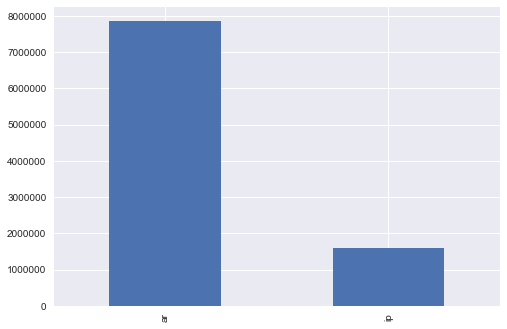

In [44]:
df_play['device'].value_counts().plot.bar()

### Define a label/target/outcome


In this task, we want to forecast if a user keeps on using the music box.
Based on our dataset, we keep the playing log dataset with active user from March 30, 2017 to May 12, 2017.
Add churn indicator. Considered to churn if have not played any songs since Apr 29. 

In [45]:
# generate the dataframe containing the uid, first and last dates of play record
uid_first_last_play_date=df_play[['uid','date']].groupby('uid').agg(['min', 'max'])
uid_first_last_play_date.head()

date           
                 min        max
uid                            
250691.0  2017-03-30 2017-04-04
932869.0  2017-03-31 2017-05-12
1634162.0 2017-03-30 2017-04-04
1680569.0 2017-03-31 2017-05-12
2757285.0 2017-03-30 2017-03-30

In [46]:
uid_first_last_play_date.columns = ["_".join(x) for x in uid_first_last_play_date.columns.ravel()]

In [47]:
# only keep the users who have played before Apr 29
uid_first_last_play_date=uid_first_last_play_date.loc[uid_first_last_play_date['date_min'] \
                                                      < pd.to_datetime('2017-04-29'),:]

In [48]:
# Define Churn users
uid_first_last_play_date['churn'] = (uid_first_last_play_date.date_max < pd.to_datetime('2017-04-29')) * 1

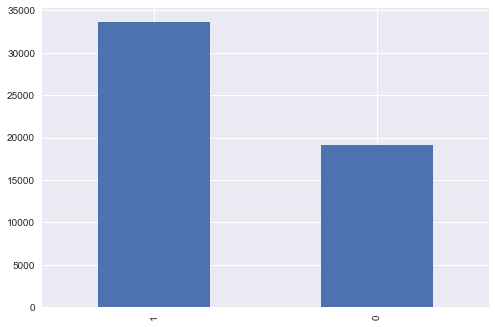

In [49]:
uid_first_last_play_date['churn'].value_counts().plot.bar()

### downsample the majority class-churn

In [51]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = uid_first_last_play_date[uid_first_last_play_date.churn==1]
df_minority = uid_first_last_play_date[uid_first_last_play_date.churn==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=1) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.churn.value_counts()

1    19100
0    19100
Name: churn, dtype: int64

### Final set of uids to keep

In [52]:
uid_keep=df_downsampled.index.tolist()

In [53]:
df_play=df_play.loc[df_play['uid'].isin(uid_keep),:]

In [54]:
# Add the column churn to the dataframe using map
df_play['churn']= df_play['uid'].map(df_downsampled['churn'])


In [55]:
# Double Check if the downsampling is correctly done on the dataframe df_play
df_play.groupby('churn').nunique()

,uid,device,song_id,song_type,play_time,song_length,paid_flag,filename,date,playtime_float,churn
churn,,,,,,,,,,,
0,19100,2,412720,3,33671,7355,2,128,44,1,1
1,19100,2,128965,3,14561,3648,2,86,30,1,1


### Save cleaned play data

In [56]:
df_play['event_type']='play'

In [57]:
df_play.to_csv('cleaned_play.csv', index=False)

In [76]:
df_play[['uid','event_type','date','song_id','churn']].head()

,uid,event_type,date,song_id,churn
221947,168130596.0,play,2017-05-12,450882,0
221948,168139046.0,play,2017-05-12,3418524,0
221949,168156407.0,play,2017-05-12,1350815,0
221950,168236980.0,play,2017-05-12,20275342,0
221951,168074596.0,play,2017-05-12,5595443,0


In [59]:
df_play[['uid','event_type','date','song_id','churn']].to_csv('play_event_table.csv',index=False)

## Download Data

In [83]:
schema ={'uid':float,'device':object,'filename':object}
df_down = pd.read_csv('down.csv',dtype=schema)

In [84]:
df_down.head()

,Unnamed: 0,filename,uid,device
0,23,20170330_1_down.log.tar.gz,167819030.0,ip
1,24,20170330_1_down.log.tar.gz,167819030.0,ip
2,25,20170330_1_down.log.tar.gz,167819030.0,ip
3,27,20170330_1_down.log.tar.gz,167819030.0,ip
4,28,20170330_1_down.log.tar.gz,167819030.0,ip


In [85]:
df_down.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490567 entries, 0 to 490566
Data columns (total 4 columns):
Unnamed: 0    490567 non-null int64
filename      490567 non-null object
uid           490567 non-null float64
device        490567 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 15.0+ MB


In [86]:
# keep the uid which are in the list uid_keep
df_down=df_down.loc[df_down['uid'].isin(uid_keep),:]

In [87]:
len(df_down.uid.unique())

16887

In [88]:
df_down['date'] = df_down['filename'].map(get_date)

In [89]:
df_down['date'].unique()

array(['2017-03-30', '2017-03-31', '2017-04-01', '2017-04-02',
       '2017-04-03', '2017-04-04', '2017-04-05', '2017-04-06',
       '2017-04-07', '2017-04-08', '2017-04-09', '2017-04-10',
       '2017-04-11', '2017-04-12', '2017-04-14', '2017-04-15',
       '2017-04-16', '2017-04-17', '2017-04-18', '2017-04-19',
       '2017-04-20', '2017-04-21', '2017-04-22', '2017-04-23',
       '2017-04-24', '2017-04-25', '2017-04-26', '2017-04-27',
       '2017-04-28', '2017-04-29', '2017-04-30', '2017-05-01',
       '2017-05-02', '2017-05-03', '2017-05-04', '2017-05-05',
       '2017-05-06', '2017-05-07', '2017-05-08', '2017-05-09',
       '2017-05-10', '2017-05-11', '2017-05-12'], dtype=object)

In [90]:
# keep the log 
df_down=df_down.loc[df_down['date']>='2017-03-30',:]

In [91]:
df_down['event_type']='download'

In [92]:
df_down[['uid','event_type','date']].to_csv('down_event_table.csv',index=False)

## Search Data

In [77]:
schema = {'uid':float,'device':object, 'song_id':object,'time':object,'filename':object}
df_search = pd.read_csv('search.csv',dtype=schema)

In [78]:
df_search.head()

,Unnamed: 0,uid,device,song_id,time,filename
0,2,154407854.0,ip,%e7%96%a4%2d%20%28%e7%94%b5%e8%a7%86%e5%89%a7%...,2017-03-01 00:00:54,1_1_search.log.tar.gz
1,4,154407327.0,ar,%E4%B8%AB%E5%A4%B4++%E7%8E%8B%E7%AB%A5%E8%AF%AD,2017-03-01 00:00:55,1_1_search.log.tar.gz
2,6,154407261.0,ip,%e8%83%8e%e6%95%99,2017-03-01 00:00:59,1_1_search.log.tar.gz
3,12,154407261.0,ip,%e8%83%8e%e6%95%99%e9%9f%b3%e4%b9%90,2017-03-01 00:01:07,1_1_search.log.tar.gz
4,19,154407327.0,ar,%E6%88%90%E9%83%BD++%E8%B5%B5%E9%9B%B7,2017-03-01 00:01:17,1_1_search.log.tar.gz


In [79]:
df_search.isnull().sum()

Unnamed: 0    0
uid           0
device        0
song_id       0
time          0
filename      0
dtype: int64

In [80]:
# Change column name
df_search.rename(columns = {'time':'date'},inplace=True)

In [81]:
df_search

,Unnamed: 0,uid,device,song_id,date,filename
0,2,154407854.0,ip,%e7%96%a4%2d%20%28%e7%94%b5%e8%a7%86%e5%89%a7%...,2017-03-01 00:00:54,1_1_search.log.tar.gz
1,4,154407327.0,ar,%E4%B8%AB%E5%A4%B4++%E7%8E%8B%E7%AB%A5%E8%AF%AD,2017-03-01 00:00:55,1_1_search.log.tar.gz
2,6,154407261.0,ip,%e8%83%8e%e6%95%99,2017-03-01 00:00:59,1_1_search.log.tar.gz
3,12,154407261.0,ip,%e8%83%8e%e6%95%99%e9%9f%b3%e4%b9%90,2017-03-01 00:01:07,1_1_search.log.tar.gz
4,19,154407327.0,ar,%E6%88%90%E9%83%BD++%E8%B5%B5%E9%9B%B7,2017-03-01 00:01:17,1_1_search.log.tar.gz
5,23,154407261.0,ip,%e8%83%8e%e6%95%99%e9%9f%b3%e4%b9%90,2017-03-01 00:01:21,1_1_search.log.tar.gz
6,24,154407854.0,ip,%e7%96%a4%2d%20%28%e7%94%b5%e8%a7%86%e5%89%a7%...,2017-03-01 00:01:22,1_1_search.log.tar.gz
7,26,154407261.0,ip,%e8%83%8e%e6%95%99%e9%9f%b3%e4%b9%90,2017-03-01 00:01:24,1_1_search.log.tar.gz
8,28,154407854.0,ip,%e7%96%a4%2d%20%28%e7%94%b5%e8%a7%86%e5%89%a7%...,2017-03-01 00:01:24,1_1_search.log.tar.gz
9,38,154407430.0,ar,%E9%BB%91%E4%BA%BA,2017-03-01 00:01:36,1_1_search.log.tar.gz


In [82]:
# keep the log
df_search=df_search.loc[df_search['date']>='2017-03-30',:]
df_search['event_type']='search'
df_search[['uid','event_type','date']].to_csv('search_event_table.csv',index=False)

/Users/zhuoqinyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
